In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv('Housing.csv')
Y=df['price']
X=df.drop(['price'],axis=1)
print(X)
print(Y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [102]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['mainroad']=le.fit_transform(X['mainroad'])
X['guestroom']=le.fit_transform(X['guestroom'])
X['basement']=le.fit_transform(X['basement'])
X['hotwaterheating']=le.fit_transform(X['hotwaterheating'])
X['airconditioning']=le.fit_transform(X['airconditioning'])
X['prefarea']=le.fit_transform(X['prefarea'])
X['furnishingstatus']=le.fit_transform(X['furnishingstatus'])

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [104]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [106]:
y_pred=regressor.predict(X_test)
y_pred

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996132,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.7048993 , 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767582, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491252, 5788125.92515323,
       4768370.18154077, 4391684.04193172, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.11941171, 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [107]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.6494754192267804


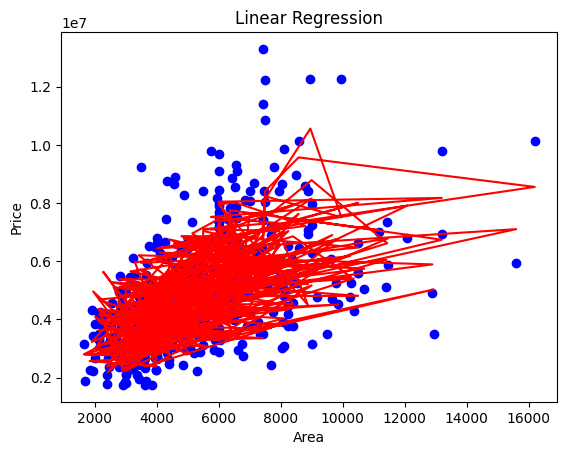

In [108]:
plt.scatter(X['area'],Y,color='blue')
plt.plot(X['area'],regressor.predict(X),color='red')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,Y_train)

LinearRegression()

In [110]:
from sklearn.metrics import r2_score
y_pred=lin_reg2.predict(poly_reg.fit_transform(X_test))
print(r2_score(Y_test,y_pred))

-2.8396302630346812
